# ECH 60 Spring 2020 week 2 
&copy; Harishankar Manikantan, Chemical Engineering, UC Davis 

**[(2.1) Arrays and vectorization](#vector) (Monday)**
*  [Introduction to arrays](#arrays) <br>
*  [Sequences](#sequences) <br>
*  [Slicing](#slicing) <br>
*  [Vectorizing](#vectorizing) <br>
*  [Storing and retrieving arrays](#storing) <br>

**[(2.2) Plotting and visualization](#plot) (Wednesday, Friday)**
*  [Pyplot](#pyplot) <br>
*  [Object-oriented plotting](#oop) <br>
*  [2D data: Pseudocolors and contours](#pcolor) <br>
*  [3D visualization: Surface plotting](#surfplot) <br>

**[Practice problems](#exer)**


<a id='vector'></a>

## (2.1) Arrays: vectors and matrices

Last week, we saw data structures representing collections of variables in the form of tuples and lists. Another form of grouped variables, perhaps the most useful and convenient one for engineering and mathematical calculations, is an `array`. Unlike lists and tuples, you can do mathematical operations on arrays. They are therefore particularly well-suited for representing force vectors, position vectors, scalar information at different point in space (like mass, concentration, ...), and pretty much any variable in an engineering problem. 

<a id='arrays'></a>


### The `array` type
Arrays are part of numpy so remember to import numpy first.

In [1]:
import numpy as np

Any list filled with numbers can be turned into a numpy array by using `np.array(listname)`:

In [2]:
mylist=[1.4,4.5,-9.5,23.8]
myarray=np.array(mylist)
print('mylist is',mylist)
print('myarray is',myarray)

mylist is [1.4, 4.5, -9.5, 23.8]
myarray is [ 1.4  4.5 -9.5 23.8]


Although this might seems identical, they are extremely different data structures. For example, `2*mylist` corresponds to the action of repeating the list twice (we saw this in week 1). This operation is callled concatanation:

In [3]:
2*mylist

[1.4, 4.5, -9.5, 23.8, 1.4, 4.5, -9.5, 23.8]

However, `2*myarray` does the mathematical operation of multiplying each element in the array by the number 2:

In [4]:
2*myarray

array([  2.8,   9. , -19. ,  47.6])

You can directly fill an array (without needing a list first) by directly entering numbers in `np.array([])` :

In [5]:
mynewarray=np.array([3.2, 4.5, 5.9])
print(mynewarray)

[3.2 4.5 5.9]


By extension, filling up a matrix (or a 2D array) requires two sets of square brackets: one set for each row, and an outer set of square brackets around the entire array (and a final parenthesis so python understands where to start and stop):

In [6]:
mymatrix=np.array([[1, 4, 5],[6, -9, 11],[0, 23, 1]])
print(mymatrix)

[[ 1  4  5]
 [ 6 -9 11]
 [ 0 23  1]]


Numpy has many useful predefined matrix arrays. For example, `np.zeros` gives an array filled with zeros

In [7]:
np.zeros(3)

array([0., 0., 0.])

For 2D arrays (or matrices) with m rows and n columns filled with zeros, use `np.zeros((m,n))`. Try this above...

Similarly, arrays filled with all entries equal to $1$ are easily obtained by `np.ones`:

In [8]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Check what `np.ones(3)` returns. And `np.eye(n)` gives the square identity matrix with n rows and n columns:

In [9]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Note that `np.array([a,b])` is simply a vector, and is neither a row nor a column in the linear algebra sense. If you need to specify shape, use `np.array([[a,b]])` for a $1\times 2$ matrix (or a row vector) and `np.array([[a],[b]])` for a $2\times 1$ matrix (or a column vector). And you can go back and forth between row and column vectors using `np.transpose()`. Python doesn't differentiate between a row or a column vector unless you explicitly make the array a matrix.

In [10]:
myrow=np.array([[1,2]])
mycolumn=np.array([[3],[4]])
print('row vector :\n',myrow) #the \n within a string indicates a newline
print('transpose of row vector :\n',np.transpose(myrow))
print('column vector :\n',mycolumn)
print('transpose of column vector :\n',np.transpose(mycolumn))

row vector :
 [[1 2]]
transpose of row vector :
 [[1]
 [2]]
column vector :
 [[3]
 [4]]
transpose of column vector :
 [[3 4]]


Matrix algebra is then straightforward. Consider the vectors $a$ and $b$, and matrix $M$ as follows: $$a=\begin{bmatrix}-4 & 5 \end{bmatrix}, \quad b=\begin{bmatrix}3 & 2\end{bmatrix}, \quad M=\begin{bmatrix}5 & -3\\2 & 4\end{bmatrix}.$$ In python code, we would define them as 

In [11]:
a=np.array([-4,5])
b=np.array([3,2])       
M=np.array([[5,-3],[2,4]])

The rules of linear algebra apply, which means you could add any two arrays of the same shape. Try `a+b` or `b-a` etc above. 

We can perform the 'dot product' (or inner product or scalar product) of any two vectors, given by $a\cdot b = a_1 b_1 + a_2 b_2$. You could do this operation by running a loop, or much more efficiently use numpy's vectorized operation `dot`:

In [12]:
np.dot(a,b)

-2

Try changing the numbers in $a$ and $b$ (try making them 3-element vectors!) to convince yourself this works. You could do `np.sqrt(np.dot(a,a))` to get the magnitude of vector `a` in one shot... try it!


Similarly, the 'outer product' (or dyadic product or tensor product) of two vector would give a matrix: $a\otimes b = \begin{bmatrix}a_1b_1 & a_1 b_2 \\ a_2b_1 & a_2b_2 \end{bmatrix}$.<br> In numpy, the outer product is simply:

In [13]:
np.outer(a,b)

array([[-12,  -8],
       [ 15,  10]])

Note that the order of operation matter: unlike the dot product, the outer product is not commutative. Check how `np.outer(a,b)` and `np.outer(b,a)` are related (and recall if this is consistent linear algebra...).

Finally, one of the more important matrix operations we will do in solving linear equations in engineering problems is matrix-matrix and matrix-vector multiplication. Calculate by hand what you expect for the 'post-multiplication' $M\cdot a$ or $M\cdot b$, the 'pre-multiplication' $a\cdot M$ or $b\cdot M$, and the matrix-matrix product $M\cdot M$. All of these are `dot` operations in numpy, and evaluate each below to see if you get consistent results:

In [14]:
np.dot(M,a)

array([-35,  12])

Numpy has a host of linear algebra tools we will use when we need to solve equations in a couple of weeks. Details can be looked up as required at the [online numpy manual](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Remember: when in doubt, look up in an online manual or just google it. The point of this course is not to memorize the syntax but to get comfortable using them in problems later on. Some of these functions are within the linear algebra submodule `linalg` of numpy. For example, calculating the matrix inverse or determinant require the `linalg.inv` or `linalg.det` function inside numpy so they should be used as:

In [15]:
np.linalg.inv(M)

array([[ 0.15384615,  0.11538462],
       [-0.07692308,  0.19230769]])

We will come back to matrix inverses and linear systems soon.

You can also generate arrays of size m x n filled with random numbers between 0 an 1 using `np.random.random((m,n))`. Or an m x n array filled with a normal (Gaussian) distribution of random numbers with mean p and standard deviation q using `np.random.normal(p,q,(m,n))`. Or a random integer between a and b (b not included) using `np.random.randint(a,b,(m,n))`. In the latter two cases, not providing `(m,n)` returns a single value instead of an array:

In [16]:
np.random.normal(0,10,(3,4))

array([[ 1.82686576,  0.57673658, -9.09903001, -3.65028136],
       [ 7.98806125,  2.36369392,  1.03494242, -5.53259057],
       [-0.63210839,  0.84778625, 20.29652871,  0.42793548]])

<a id='sequences'></a>


### Generating sequences

We will frequently need to generate evenly spaced numbers in a specified range when we start solving equations and doing numerical calculus later on. We already saw `np.arange` in week one, and a similar function is `np.linspace`.

`np.arange(start,end,increment)` generates a first entry equal to `start`, the next entry equal to `start`+`increment`, and so on, adding the `increment` to obtain the next value until the `end` is reached. __The end value is not included in the array__. Try different combinations below:

In [17]:
np.arange(5.1,8.6,0.8)

array([5.1, 5.9, 6.7, 7.5, 8.3])

The default `start` is $0$, and the default `increment` is $1$. So these two entries are optional. With only two arguments, `arange` assumes that the increment is $1$. With only one argument, `arange` assumes that the start is $0$ _and_ the `increment` is $1$. Try `np.arange(5,15)` and `np.arange(15)` to get a sense of how this works:

In [18]:
np.arange(5,15)

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In some application, we might not know the _size of the increment_ between each consecutive point, but we might know the _number of increments_. This is when `linspace` becomes useful.

`np.linspace(start,end,N)` generates `N` equally spaced points between `start` and `end`. __The end value is  included in the array__. And `N` defaults to 50 elements if not specified. Try different combinations below:

In [19]:
np.linspace(5.1,8.6,5)

array([5.1  , 5.975, 6.85 , 7.725, 8.6  ])

When you need you compute values of a function or expression over a range, `np.linspace` is the appropriate function as it allows you to exactly control the start and end points. When the exact spacing between consecutive points is important, `np.arange` is the better option.

What if you wanted to control both the end points _and_ the increment? We will need a lot of this in numerical calculus later on. In such case, explicitly define the start, end, and the increment, and use `arange` with a careful correction on the end argument (because end is not included in `arange` by default):

In [20]:
start=10
end=12
space=0.2
np.arange(start,end+space,space)

array([10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. ])

<a id='slicing'></a>

### Accessing and slicing array elements


Each entry in an array has an 'index' corresponding to its position from the left (if a row) and from the top (if a column). Multidimensional arrays have multiple indices: a matrix has a row number and column number for each entry. __Always remember that python starts counting indices from 0__. And you access that element using square brackets:

In [21]:
myarray=np.array([3,5,9,7]) # array indices are 0, 1, 2, 3
myarray[2]  # retrive entry with index 2 (or third entry)

9

The idea is the same for matrices (or three- or four- dimensional arrays...):

In [22]:
myarray=np.array([[3,5,9,7],[6,-5,8,3],[1,0,9,6]])   # row indices are 0, 1, 2 and column indices 0, 1, 2, 3
myarray[1,2]   # retrive entry at row index 1 (second row) and column index 2 (or third column)

8

Extracting multiple values at the same time is called __slicing__, and you do this using the syntax `arrayname[start:end:stride]`. This is kind of like the `arange` definition except here the numbers you provide are the _indices_ within the array, and therefore can only be whole numbers. The end point is not included. The stride is optional, and defaults to 1 if not provided (and the second colon may also be omitted if the stride is not specified). 

The start defaults to 0 (the first entry) if not provided. The end defaults to the index of the last entry of the array if not provided. Not specifying either and only providing a colon like `arrayname[:]` will extract the whole array.

So, slicing the first 10 entries (index 0 through index 9) of an array named `myarray` can be done via `myarray[0:10:1]`, or simply `myarray[:10:]`, or even more simply `myarray[:10]` as the start and stride are the default anyway and the last colon can be omitted if stride is the default 1:

In [23]:
myarray=np.arange(11,31)  # array containing numbers 11 through 30
myarray[:10] # slice first 10 entries

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

You could similarly slice every third element (`myarray[::3]`), every element from index 4 onwards (`myarray[4::]`) or more complicated slices like every third element from 5th (index 4) to 15th (index 14, but remember end is not included so use 15 if you need this element too) using `myarray[4:15:3]`, etc. Try these combinations to familiarize yourself with slicing **(remember again that python indices start at 0)**:

In [24]:
myarray[4:14:3]

array([15, 18, 21, 24])

Finally, matrices can be sliced using the same logic. To extract the second and third entries (column indices 1 through 3, 3 not included) in the first row (row index 0) of a matrix `A`, you could use `A[0,1:3]`. For all entries in the third column, you could use `A[:,2]`. Try both...

In [25]:
A=np.array([[3,5,9,7],[6,-5,8,3],[1,0,9,6]])
A[0,1:3]

array([5, 9])

<a id='vectorizing'></a>

### Vectorizing


Now that we know how to generate sequences of numbers, we can start performing mathematical operations on these sequences. Let's say we want to see what the exponential function $e^x$ looks like between 0 and 1. A straightforward way to do this is to run a loop to generate numbers between 0 and 1, and then perform the exponential operation for each element. Something like this:

In [26]:
for x in np.arange(0,1,0.2):   # run a loop for x from 0 to 1 in steps of 0.2
    y=np.exp(x)   # exponentiate each element of x term-by-term
    print(y)

1.0
1.2214027581601699
1.4918246976412703
1.822118800390509
2.225540928492468


While this will give you the correct answer, python and numpy allows you to _vectorize_ your code, meaning that you can perform most operations on entire arrays of numbers. This means we can do the following:

In [27]:
x=np.arange(0,1,0.2)   # create an array of 20 entries from 0 to 5
y=np.exp(x)   # exponentiate entire array at once
print(y)

[1.         1.22140276 1.4918247  1.8221188  2.22554093]


The same applies to `sin`, `cos`, `log`, `sqrt`, multiplication/addition/division by a constant, raising to a power etc: each of these operations act on every term of the array separately. Try `np.sin(x)` or `np.sqrt(x)` or `3*x**2+5` or any similar operation....

In [28]:
3*x**2+5

array([5.  , 5.12, 5.48, 6.08, 6.92])

While this might seem like just running a `for` loop behind-the-scenes through the elements of `x`, vectorized operations are faster beacause the back-end is optmized to do these operations much better than a loop we would normally write.

<a id='storing'></a>

### Storing and retrieving data


Every variable you define in a notebook are 'alive' only as long as the notebook is open. The code remains saved but the numbers you assign to variables are lost when you close the file. So how do we store data generated by running a code for later use or to export to some other document or to share with people?

Arrays are easily saved on your computer using the `np.save("filename",arrayname)` command. This saves a file with extension .npy in the same folder as your notebook file. Later, if you wish to load the data into another file or another python code, use `newarrayname=np.load("filename.npy")`, and the variable `newarrayname` will load that data.

The .npy format is very efficient for storage and takes very little memory on your computer. However, it can only be read by python. If you wanted something that's 'human-readable', meaning something that you could double-click and read on a device that doesn't have python (or if you want to share data with a colleague), you can instead save in the .txt or .csv (comma separated values) or .tsv (tab separated values) formats. In these cases, use `np.savetxt("filename.txt",arrayname, delimiter=",")` or `np.savetxt("filename.csv",arrayname, delimiter=",")` or `np.savetxt("filename.csv",arrayname, delimiter="\t")`, respectively. The `delimiter` tells python to put a comma or a tab space after each entry so other programs (like Excel or text editors) can recognize individual entries easily. And you can load these files via `newarrayname=np.loadtxt("filename.csv", delimiter=",")` etc.

Try the save features below. Store the matrix A in .npy, .txt, and .csv formats. Compare the file sizes in your directory. Try opening the .csv or .txt files using non-python programs (like text editors, Excel etc).

In [29]:
A=np.array([[3213,55656,93423,73424],[6245,-5455,886,3207],[19345,4460,-952,6668]])

# uncomment and run any of the following to save in different formats

np.savetxt("A_matrix.csv", A, delimiter=",")
#np.savetxt("A_matrix.txt", A, delimiter=",")
#np.save("A_matrix",A)

These files are stored on your computer even after you close this notebook. You can retrive the stored value into a new variable B as follows:

In [30]:
B=np.loadtxt("A_matrix.csv", delimiter=",")
print(B)

[[ 3213. 55656. 93423. 73424.]
 [ 6245. -5455.   886.  3207.]
 [19345.  4460.  -952.  6668.]]


<a id='plot'></a>



## (2.2) Plotting and visualization

Visualizing data is an important part of scientific communication. In python, plotting requires a set of functions in the `matplotlib` module. You can plot in python using either of two methods: a `pyplot` interface or an 'object-oriented' approach. The former is more like Matlab, and the latter is slightly more powerful and flexible. Depending on your need and preference, you could use either to visualize data

<a id='pyplot'></a>


### The `pyplot` interface

Like with numpy in numerical operation, plotting codes should always be preceded with this import line.

In [31]:
import matplotlib.pyplot as plt

Similar to the `np` nickname we gave `numpy`, `plt` is a common nickname for `matplotlib.pyplot`. You can name it whatever you want (or not nickname and use the whole name) but you can see in what follows how having a short nickname is useful when you use it a lot. 

The logical idea for plotting any function $f(x)$ using `pyplot` usually goes like this: generate the range of required `x_values` via a loop or, better still, a vector. Then, determine a `y_values` that represent the function using a loop or as a vector operation. Then, plot using the `matplotlib.pyplot.plot(x_values,y_values)` or simply `plt.plot(x_values,y_values)` command, and then tell python to show the plot using the `plt.show` command. And that's it! The rest is making the plot look good, which we will spend a lot of time in the coming weeks on.

For example, plotting $sin(x)$ from $x=0$ to $x=10$ would look like this (make sure pyplot and numpy are imported first):

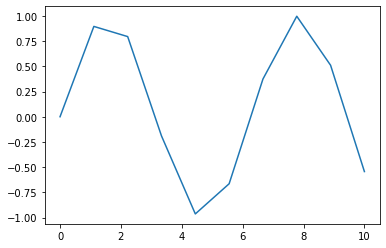

In [32]:
# define parameters for later use
x_min=0
x_max=10
num_points=10

# generate an array for x values
x_values=np.linspace(x_min,x_max,num_points)

# generate an array using vectorized sine
y_values=np.sin(x_values)

# create a plot
plt.plot(x_values,y_values)

# tell python to 'show' the plot
plt.show()

That does look like the sine wave, but it's kind of choppy. You can change the `num_points` to 20 or 50 or 100 (try them one by one!) to get it to be have a better 'resolution'. That's the advantage of choosing smaller step sizes.

The code above also highlights a key aspect of good coding habit: always define parameters in the beginning and use them in their variable form later on. As you develop longer and more intricate codes, it will be much easier to read and change things if you had a `num_points` defined in the beginning. Changing that one instance takes care of the rest of the code.

Always check that the x and y arrays have to have the same length, or else `plot` will show you an error.

Some basic plot formatting options are illustrated below. The [official pyplot documentation](https://matplotlib.org/tutorials/introductory/pyplot.html) has much more detail, and is a fantastic resource that you should always refer to make pretty plots (also check the [matplotlib gallery](https://matplotlib.org/gallery/index.html) for ideas and inspiration). Again, no need to memorize: you can always look this up or simply google. 

The first thing you need in a plot are labels. **Always mark labels.** This can be done with `plt.xlabel('a good name for x')`, `plt.ylabel('some name for y')`, and `plt.title('a fantastic title')'` after the `plt.plot` line and before the `plt.show` line above. Try this, and provide reasonable labels and titles for your sine wave.

You can change the color by using `'red'`, `'blue'`, `'black'`, `'green'` etc or simply `'r'`, `'b'`, `'k'`, `'g'` as arguments in the `plot` command. You can change the line style using `':'`, `'--'`, `'-.'` etc for dotted, dashed, or dot-dashed lines. You can even mark points with shapes instead of drawing a line: draw circles, squares, diamonds, crosses etc using `'o'`, `'s'`, `'d'`, `'+'`. And you can use combinations: `'ro'` generates red circles, and `'g-.'` generates a green dash-dot line. Similarly, you can change font size and color of labels and titles using arguments like `fontsize='16'` or `color='r'` within the respective commands. Try it!

These are particularly useful if you need to plot multiple sets of data on the same plot. In this case, it is also useful to set a 'label' to each plot so you can create a legend later:

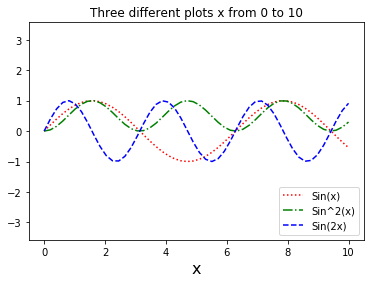

In [33]:
x_min=0
x_max=10
num_points=50
x_values=np.linspace(x_min,x_max,num_points)

# generate multiples sets of y data: sin(x), square of sin(x), sin(2x)
y1_values=np.sin(x_values)
y2_values=np.sin(x_values)**2
y3_values=np.sin(2*x_values)

# plot y1 using red circles, create a label
plt.plot(x_values,y1_values,'r:',label="Sin(x)")

# plot y2 using green dash-dot, create a label
plt.plot(x_values,y2_values,'g-.',label="Sin^2(x)")

# plot y3 using blue dashed, create a label
plt.plot(x_values,y3_values,'b--',label="Sin(2x)")

plt.xlabel('x',fontsize='16') # change label size or color if required
plt.title('Three different plots x from 0 to 10')

# show legend, optionally set location using combinations of 
# lower/center/upper and left/center/right
plt.legend(loc='lower right')

# scale x and y axis equally
plt.axis('equal')

plt.show()


The line `plt.axis('equal')` force each axis to use the same scaling, so the plot is not artificially stretched along y and squished along x as before. Try `plt.axis('square')` if you additionally want the plot to have a square shape. If you want the axes scaled but not the same length (and therefore not square), use `plt.axis('scaled')`. You may also change the limits of x and y axis using the `plt.xlim(start,end)` or `plt.ylim(start,end)` lines. This should be done AFTER setting the scaled/equal/square options, or else they get overwritten when the axes are stretched or compressed. Try each of these above.

What if you wanted the x or y axis or both to be in log scale? Use `plt.semilogx()` or `plt.semilogy()` or `plt.loglog()` after you create the figure (and before `plt.show()`).  Try it! 

How would you export the figure if you wanted to attach in a report or print for a project? Use `plt.savefig("filename.pdf")` before the `plt.show()` command. If you prefer jpg files, use `plt.savefig("filename.jpg",dpi=200)` to specify the resolution in dpi. Same with png or svg format image files. These files are saved in the same folder that the notebook (ipynb) file is in.

There are many many more plot manipulations and embellishments one can do. See tutorials and examples in [official pyplot documentation](https://matplotlib.org/tutorials/introductory/pyplot.html) for inspiration. We will also discuss case-specific plot options in future examples.

Another general plot strategy is subplots: this helps you have multiple panels of plots next to each other using the `plt.subplot(rows,columns,subplot_index)` command before each `plot` command. Let's say you find the above plot too congested. The following code splits it into three separate subplots, and additionally does some formatting with the y-limits and scaling:


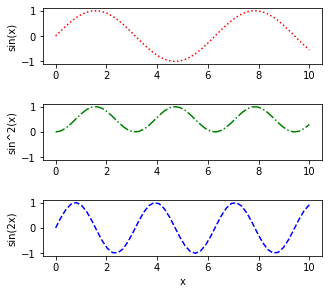

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x_min=0
x_max=10
num_points=50
x_values=np.linspace(x_min,x_max,num_points)

# generate multiples sets of data: sin(x), square of sin(x), sin(2x)
y1_values=np.sin(x_values)
y2_values=np.sin(x_values)**2
y3_values=np.sin(2*x_values)

# Specify figure size if necessary. Try removing this line...
plt.figure(figsize=(5,5))

# subplot 1, top
plt.subplot(3,1,1)
plt.plot(x_values,y1_values,'r:')
plt.ylabel('sin(x)')
plt.axis('scaled') # scaling optional, to make it look good
plt.ylim(-1.1,1.1) # limits optional, change as needed

# subplot 2, center
plt.subplot(3,1,2)
plt.plot(x_values,y2_values,'g-.')
plt.ylabel('sin^2(x)')
plt.axis('scaled') # scaling optional, to make it look good
plt.ylim(-1.1,1.1) # limits optional, change as needed

# subplot 3, bottom
plt.subplot(3,1,3)
plt.plot(x_values,y3_values,'b--')
plt.xlabel('x')
plt.ylabel('sin(2x)')
plt.axis('scaled') # scaling optional, to make it look good
plt.ylim(-1.1,1.1) # limits optional, change as needed

plt.show()

You can even create 2x2 or larger subplots! The `subplot_index` starts at the top-left subplot and counts across the row first and continues to the next row and so on. And this is the only place where python starts counting at 1.

Note that all formatting (labels, axes, scaling) have to be provided separately to each subplot. 

Also, horizontally stacking subplots might 'squish' them together. Try a (1x3) layout instead above: use the `plt.tight_layout()` command at the end to correct if that happens.


<a id='oop'></a>



### The object-oriented interface

Python also allows an alternative (and sometimes convenient way) to format plots and subplots using an 'object-oriented' approach to get the same results as above. But the basic idea of object-oriented plot formatting is that every action is connected to an 'object' whose properties you manipulate as needed. 

In this approach, you first define a figure with a name of your choice using `myfig = plt.figure()`. This creates a 'container' variable named `myfig`. A figure can contain many axes (3 in the example above). You can create and names axes using `axes_name = myfig.gca()` (gca is short for get current axis) for a single axis or `axes1_name = myfig.add_subplot(1,3,1)` etc for multiple subplots. Then, plot on specific axes using `axes_name.plot(x_values, y_values, 'color_or_style_options')`. Set titles of labels using `axes_name.set_title('titlename')`, and set axis limits using `axes_name.set_xlim(min,max)` etc. 

In many ways, this is similar to the standard `pyplot` approach before: all actions apply on a variable with the name of the axes or figure in the object-oriented approach, as against on the `plt` function in the previous approach. Although this does not look very different, the object-oriented approach give much more control for intricate and detailed plotting. 

The following object-oriented code acheives the same result as the last pyplot code (notice line by line similarities):

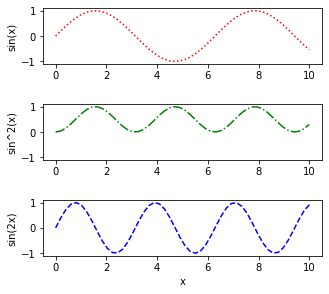

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x_min=0
x_max=10
num_points=50
x_values=np.linspace(x_min,x_max,num_points)
# generate multiples sets of data: sin(x), square of sin(x), sin(2x)
y1_values=np.sin(x_values)
y2_values=np.sin(x_values)**2
y3_values=np.sin(2*x_values)

# define an object named 'myfig'; specify size if needed, else leave blank
myfig = plt.figure(figsize=(5,5))

# subplot 1 as an object named 'ax1' that belongs to 'myfig'
ax1 = myfig.add_subplot(3,1,1)
ax1.plot(x_values,y1_values,'r:')
ax1.set_ylabel('sin(x)')
ax1.set_ylim(-1.1,1.1)
ax1.axis('scaled')


# subplot 2, center
ax2 = myfig.add_subplot(3,1,2)
ax2.plot(x_values,y2_values,'g-.')
ax2.set_ylabel('sin^2(x)')
ax2.axis('scaled')
ax2.set_ylim(-1.1,1.1)

# subplot 3, bottom
ax3 = myfig.add_subplot(3,1,3)
ax3.plot(x_values,y3_values,'b--')
ax3.set_xlabel('x')
ax3.set_ylabel('sin(2x)')
ax3.set_ylim(-1.1,1.1)
ax3.axis('scaled')

plt.show()

What if you wanted to generate filled plots? Try `plt.fill_between` or `ax.fill_between` in either approach. Read up on how to do this at the corresponding [matplotlib documentation](https://matplotlib.org/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py).

What about grid lines? Try `ax.grid(True)`.

Matplotlib can easily handle errorbars and scatter plots. Looks up this documentation, or see practice problem (4) and (6) below.

<a id='pcolor'></a>


### 2D data: Pseudocolor and contours plots

The above examples illustrated plotting one set of data (along y) against another set of data (along x). Often, we will run into example where there is a z value for every x and y. For example, you might experimentally measure the concentration of a catalyst (the z value) for every point on a flat plate (represented by x-y plane) and want to visualize this. Or you might measure temperature of a 2D surface and want to plot contours of equal temperature.

One way to do this is to use _pseudocolors_. Here, the idea is that each (x,y) point is given a color that matches the corresponding z values. In python, this can be achieved using the `pcolor`, `pcolormesh`, or `imshow` commands. For example, the file Mandelbrot.csv contains a 2D array of data that represents the famous fractal shape called [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set). Let's first load it into a variable (import numpy first if you haven't yet):

In [36]:
mandel=np.loadtxt("Mandelbrot.csv",delimiter=",")

Visualizing this 2D array is then as simple as using `plt.pcolor(arrayname)` (import pyplot first if you haven't yet):

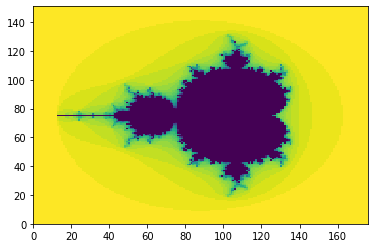

In [37]:
plt.pcolor(mandel)
plt.show()

Try using `plt.imshow` or `plt.pcolormesh` instead above. The differences are subtle and mostly indistinguishable unless you need very specific control.

Alternatively, you could use contour lines (like in topographical maps) to represent lines of equal z values (like height of mountains on a map). In python, this is done using the `contour` command. If you like to fill between these contour lines with color, use the `contourf` (f for filled) command. Try `plt.contour` or `plt.contourf` with the Mandelbrot set visualization above.

There are dozens of colormaps (`cmap`), with names like `RdYlGn` (red-to-yellow-to-green) or `coolwarm` (blue-ish cool to red-ish warm) or `Blues` or `Greens` (just one color, but increasing opacity). Explore the full list of [colormaps here](https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html). Try changing the colormap to one that you like from the link to visualize the Mandelbrot set better: for example, try `plt.contourf(mandel,cmap='PiYG')` or `plt.pcolormesh(mandel,cmap='YlOrRd')`. And you can add a colorbar by adding `plt.colorbar()`.

You can embellish and beautify pseudocolor plots example like with simple plots. Try `plt.axis('equal')`, `plt.axis('off')`, `plt.xlabel('name of x axis')`, or `plt.title('a good title')` above. And, like before, you can save the figure in different formats or resolutions: for example, try `plt.savefig("coolfigure.png",dpi=200)`.


Often, you will need to visualize a function $f(x,y)$ using pseudocolor. The first step then is generating a 2D array of z values corresponding to each x-y location. For this, first generate 2D x and y arrays using the `np.meshgrid` command. The following example generates meshgrids and evaluates the function $z=f(x,y)=\sin\left(\sqrt{x^2+y^2}\right)$:

In [38]:
# generate x and y arrays
x = np.arange(-5, 5.5, 0.5)
y = np.arange(-5, 5.5, 0.5)

# generate x and y grids
# creates 2D array xgrid and ygrid with x and y locations at every point on the plane.
xgrid, ygrid = np.meshgrid(x,y)

# z=f(x,y)
z_value = np.sin(np.sqrt(xgrid**2 + ygrid**2))

Then, we can visualize just like in the previous example. The following code runs contourf and pcolormesh in 2 subplots, and uses the the object-oriented approach.

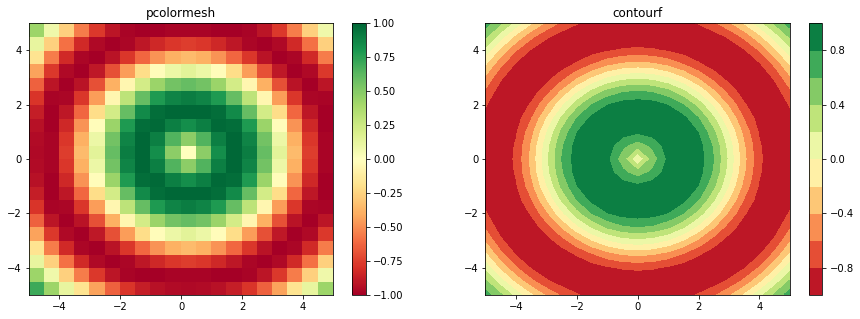

In [39]:
# remember figure and axes object names are whatever you wish them to be
coolfig = plt.figure(figsize=(15,5))

# axes #1
coolax1 = coolfig.add_subplot(1,2,1)

# note that colored axes must be named (e.g. c1 here) to set the colorbar later
c1=coolax1.pcolormesh(x, y, z_value, cmap='RdYlGn', vmin=-1, vmax=1)
coolax1.set_title('pcolormesh')
coolfig.colorbar(c1,ax=coolax1)

# axes #2
coolax2 = coolfig.add_subplot(1,2,2)

# note that colored axes must be named (e.g. c2 here) to set the colorbar later
c2=coolax2.contourf(x, y, z_value, 10,cmap='RdYlGn', vmin=-1, vmax=1)
coolax2.set_title('contourf')
coolfig.colorbar(c2,ax=coolax2)

plt.show()

As you can see, `pcolormesh` simply gives each block on the x-y grid a color. Increasing the resolution by generating more x,y data (try `np.arange(-5, 5.5, 0.05)` to generate finer data) will make better `pcolormesh` plots ...  try it. 

On the other hand, `contourf` interpolates between points of given data. This might be useful if your x,y data are obtained from an experiment and you cannot get finer measurements. So even with a 'low input resolution', you can show 'smoother' plots by changing the number of interpolation points. This is the number right after the `z_values`. Try changing it to 100.

`vmin` and `vmax` are min/max of z values. If you do not know this in advance (for example, if you have a large table of data from an experiment), you can easily determine these using `z_value.min()` and `z_value.max()`, respectively. Change the function you are plotting above to $z=xy-\sin(x)\cos(y)$, and see what the colors look like, then use `vmin=z_value.min()` etc to correct.

<a id='surfplot'></a>


### 3D visualization: surface plots

The alternative strategy to visualize z data is to draw a 'surface plot'. Use `axesname.plot_surface` to plot a surface corresponding to the z values. You will also need to import the 3D Axes function `Axes3D` to get the right projection. The following code imports necessary modules, creates x and y arrays and grids, generates z values corresponding to $z=f(x,y)=\sin(\sqrt{x^2+y^2})$, and plots a surface using the object-oriented approach:

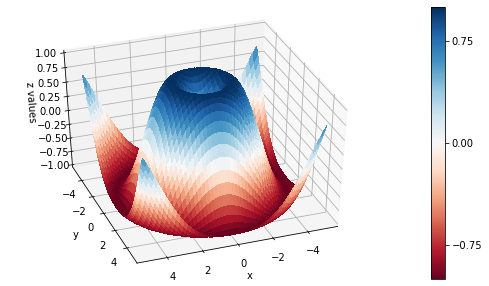

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.cm

# same as before, define a figure with any name
mynewfig = plt.figure(figsize=(8,5))

# define an axis using gca, also set projection='3d' for isometric view
new_axes = mynewfig.gca(projection='3d')

# alternativel, this also works: new_ax = mynewfig.add_subplot(projection='3d')

x = np.arange(-5, 5, 0.05)
y = np.arange(-5, 5, 0.05)

# generate x and y grids
xgrid, ygrid = np.meshgrid(x,y)

# z=f(x,y)
z_value = np.sin(np.sqrt(xgrid**2 + ygrid**2))

# surface plot, change colormap to test other possibilities...
surf1=new_axes.plot_surface(xgrid,ygrid,z_value,antialiased=False,cmap='RdBu')

# set z limits
new_axes.set_zlim(-1, 1)

# labels
new_axes.set_xlabel('x')
new_axes.set_ylabel('y')
new_axes.set_zlabel('z values')

# you can control the width fraction occupoed by the colorbar,
# a 'padding' gap between the main axes and the colorbar (can be negative ...!),
# and the ticks that you want seen on the colorbar
mynewfig.colorbar(surf1,ax=new_axes,fraction=0.05,pad=0.1,ticks=[-0.75,0,0.75])

# change elevation and rotation angles (both from 0 to 360)
new_axes.view_init(40,70)
plt.show()

# comment the plt.show() above and uncomment the following line to save a jpg figure
# plt.savefig("filename.jpg",dpi=400)

Note that the `figure`, `show` and `savefig` functions apply to `plt` even in the object-oriented approach. All formatting functions (data, labels, limits, titles, ...) apply to the object axes.

By default, `plot_surface` only uses 50 data points along each direction to generate the surface. You can see the 'webbing' corresponding to these 50 points on the surface above. If you want to force python to use more data (and therefore generate 'smoother' plots), you can provide the `cstride` (column stride) and `rstride` (row stride) keys as follows: `new_axes.plot_surface(xgrid,ygrid,z_value,cstride=1,rstride=2,cmap='RdBu')`. This forces python to use every column data and every other row data, for instance. **Be aware**, however, that more data points also uses more processing time and could overload your browser and take upto a minute to generate the figure.

The `antialiased` key controls the effect of [aliasing](https://en.wikipedia.org/wiki/Spatial_anti-aliasing): this is optional (try it with `True` or `False` to get a sense of the difference).

The `new_axes.view_init(angle1,angle2)` command give you the option to 'view' at different angles or rotate the plot to examine from different perspectives. Try different combinations between 0 and 360 degress for both values. 

Finally, in many real problems, we do not have the z values in advance, but instead we measure or simulate z values for various points on a 2D surface. For example, the file temperature.csv contains the measured temperature of a 20 cm $\times$ 10 cm plate in comma separated values (csv) format, with data recorded at 1 mm resolution. To visualize this data, you would first load it using `np.loadtxt("filename.csv", delimiter=",")`. Then we can determine the size of the loaded array using the `shape` function:


In [41]:
temp_data=np.loadtxt("temperature.csv", delimiter=",")
temp_data.shape

(100, 200)

To create corresponding x and y arrays, use `np.linspace(start,end,nx)` and `np.linspace(start,end,nx)`, where `nx` and `ny` are the shape values. Note that `shape` returns the number of rows (or y locations) as the first number (100 here), and number of columns (or x locations) as the second number (200 here). These would correspond to `ny` and `nx`, respectively: the ORDER MATTERS for rectangular arrays! 

Once you have the (1D) arrays corresponding to x and y, create meshgrid arrays for both coordinates:

In [42]:
# determine number of rows and columns in dataset, rows first so ny first
ny,nx=temp_data.shape

# generate an x and y array for rows and columns (here between 0 and 2 cm for x, and between 0 and 1 cm for y)
xx=np.linspace(0,2,nx)
yy=np.linspace(0,1,ny)

# generate grid matrices for x and y
xgrid, ygrid = np.meshgrid(xx,yy)

Now we have an `xgrid` and `ygrid` matrices of the same size as `temp_data`. Then, generating the surface plot is identical to the example above (remember to import pyplot and Axes3D if you haven't yet):

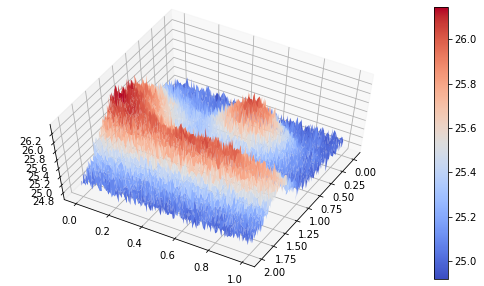

In [43]:
# same as before, define a figure with any name
mynewfig = plt.figure(figsize=(9,5))

# create an axis and surface plot and colorbar etc as necessary
mynewaxis = mynewfig.gca(projection='3d')
surf_data=mynewaxis.plot_surface(xgrid,ygrid,temp_data,cmap='coolwarm')

# colorbar is part of figure object (and axis object as the ax argument)
mynewfig.colorbar(surf_data,ax=mynewaxis)

# pick viewing angle, then show
mynewaxis.view_init(60,30)
plt.show()


Try viewing this dataset using pseudocolor or filled contours. Try playing around with different colormaps.

Finally, these examples are only meant to give you a general idea and to get your feet wet. Matplotlib is extremely versatile in plotting a whole range of different kinds of graphics including scatter plots and errorbars (see problems 4 and 6 below), histograms (we will use these in doing statistics problems next week), pie charts, streamlines, polar plots, and many more (even fun [xkcd](https://www.xkcd.com) style plots!). Explore these as you need them at the [official  matplotlib gallery](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py). Clicking on plots in this gallery gives you the source code which you can learn from and adapt as required.

<a id='exer'></a>



### Practice Problems

(1) Create a 2D array to represent the following matrix using a nested loop (a loop within a loop):
$$\begin{bmatrix} 4 & 8 & 12 & 16 & 20\\6 & 12 & 18 & 24 & 30\\ 8 & 16 & 24 & 32 & 40\end{bmatrix}$$

Now, create the same matrix using `np.arange` (a useful function is `np.vstack([rowvector, newrow])`... look up its documentation):

Now slice the matrix you created to extract (i) just the second row, (ii) the central three entries in the second row, (iii) the first, third, and fifth elements in the third row

(2) Recall from week 1 that the Taylor series expansion for the exponential function is $$e^x=\sum_{i=0}^\infty \frac{x^i}{i!} = 1+x+\frac{x^2}{2}+\frac{x^3}{6}+...$$ Generate a plot in the range x=0 to x=5 containing four different curves: (i) this approximation with only the first two terms, (ii) the first three terms, (iii) the first four terms, and (iv) the actual exponential function using `np.exp(x)`. Set the y-axis to be on a log scale. Choose colors and styles of lines to make sure all lines are uniquely visible. Add x and y lalels and a legend. Use the object-oriented approach.

(3) Create a 3 x 1 subplot showing the pseudocolor, filled contour and surface plot version of the function $f(x,y)=\sin(x)\sin(y)$ for $x$ and $y$ between $0$ and $\pi$

(4) Errorbars are a useful way of showing the confidence of your measured/simulated data. The file pollutant.txt contains hourly information about the concentration of a pollutant in a test chamber. The first and second columns are the time and average concentration across multiple measurements. The third column is the recorded standard deviation (a good indicator of the error in spread) across measurements performed at a given time. We wish to see the average behavior along with the errror. 

Pyplot uses `plt.errorbar(x,y,xerr=a,yerr=b,fmt='g-')` to plot x-y data along with error bars of size a and b along the x and y directions. All variables x, y, a, and b must be of the same array size. The `fmt` line formats the color and style of the line just like with simple plots, here shown for a green solid line. The error arguments `xerr=a` and `yerr=b` are both optional: in our pollutant example, we only have errors in concentration (not in time). 

Load the data and construct this plot with red circular symbols and errorbars.

(5) The COVID-19 pandemic is in all of our minds at this time. The New York Times maintains a current list of state-wide counts at https://github.com/nytimes/covid-19-data in csv fomat. Download the raw data from the csv file, write a function to extract the number of cases in California and New York as a function of days since first case, and plot these on a semilog axis (days along x in linear scale, number of cases along y in log scale).

Note that the csv file has data entries corresponding to dates and names of states in string format, which would need a `dtype='str'` argument in the `loadtxt` command. And it has a heading row with titles. We can skip rows or selectively extract columns using the `usecols` and `skiprows` arguments. For example, `np.loadtxt("filename.csv", delimiter=',',dtype='str', usecols=[2],skiprows=2)` would load data type string from the third column only and it would skip the first 2 rows. Many more careful loading manipulations are possible using other arguments; for details, look in the [numpy loadtxt documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). We will learn more powerful data handling methods next week.

(6) [Scatter plots](https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html) are another great way to visualize data. Scatter plots essentially do the same job as simple plots with circles or other symbols representing the data without a line connecting them, but it doesn't require the x-data to be sequential. And scatter gives more control over formatting individual data points. 

For instance, the file OldFaithful.tsv contains the duration of recorded eruptions of the famous geyser in minutes in the first column, and the second column represents the duration in minutes until the next eruption (extracted from [this paper](https://doi.org/10.2307/2347385)). Extract these using the `delimiter="\t"` argument in `loadtxt`. Check the tsv file to see if there is a header row and skip it if necessary (see problem 5). Then create a scatter plot using `plt.scatter(xdata,ydata)` and appropriately label it. See how your plot compares with Fig.1 of the original paper.

Scatter plots are great at generating insights from large amounts of data. For example, can you say by looking at the scatter if there is a relation between the two variables? Are there 'clusters' of data? Does a longer or shorter eruption statistically suggest a longer or shorter wait till the next eruption?

Let's now pretend that there was additional data corresponding to the height of the eruption in meters. Scatter plots provides a way to visualize one more 'dimension' in a special way. Create a fictitious 'height' array filled with random integers between 0 and 100 (use the `randint` function) with the same number of entries as the other two eruption datasets. You can add the height 'dimension' to your scatter plot using the `s=height` (s for size) argument in scatter: `plt.scatter(x,y,s=height)`. You can further embellish this by providing an additional transparency argument `alpha=float` where float is between 0 and 1. See the scatter plot demonstration linked above to learn more. 